In [111]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Import dataset

In [112]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# load some image

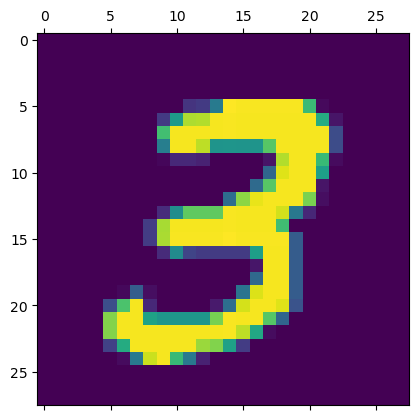

In [113]:
plt.matshow(x_train[7])

In [114]:
x_train.shape

(60000, 28, 28)

# Data preprocessing

In [115]:
x_train = x_train / 255
x_test = x_test / 255
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Create 1 dementionl metrics

In [116]:
x_train_1d = x_train.reshape(len(x_train),28*28)
x_test_1d = x_test.reshape(len(x_test),28*28)

In [117]:
x_train_1d

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Create model

In [118]:
model= keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_1d,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4651 - accuracy: 0.8782
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3033 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2828 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9251


# check accurancy

In [119]:
model.evaluate(x_test_1d,y_test)

313/313 [==============================] - 3s 2ms/step - loss: 0.2682 - accuracy: 0.9254


[0.2682241201400757, 0.9254000186920166]

# check prediction

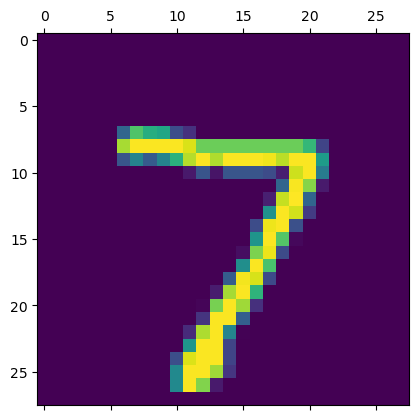

In [120]:
plt.matshow(x_test[0])

In [121]:
pred = model.predict(x_test_1d)
pred[0]

313/313 [==============================] - 3s 1ms/step


array([1.5002856e-02, 3.0940305e-07, 6.5924376e-02, 9.6224517e-01,
       2.8500441e-03, 1.1268636e-01, 2.3125144e-06, 9.9970651e-01,
       1.2441221e-01, 7.0766681e-01], dtype=float32)

In [122]:
np.argmax(pred[0])

7

In [123]:
predicted_number = [np.argmax(i) for i in pred]

In [124]:
predicted_number[:5]

[7, 2, 1, 0, 4]

In [125]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted_number)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    0,    2,    1,    6,    7,    2,    2,    1],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   5,   10,  911,   18,   12,    6,   13,   10,   44,    3],
       [   2,    0,   19,  922,    1,   24,    3,   10,   21,    8],
       [   1,    1,    2,    1,  928,    0,   11,    3,   10,   25],
       [   7,    2,    2,   31,   11,  782,   13,    5,   33,    6],
       [   7,    3,    3,    2,    8,   15,  914,    2,    4,    0],
       [   1,    5,   21,    8,   10,    1,    0,  935,    3,   44],
       [   6,    9,    5,   18,    9,   27,    9,    5,  876,   10],
       [  11,    6,    1,    9,   38,    9,    0,   14,    6,  915]])>

Text(95.72222222222221, 0.5, 'Truth')

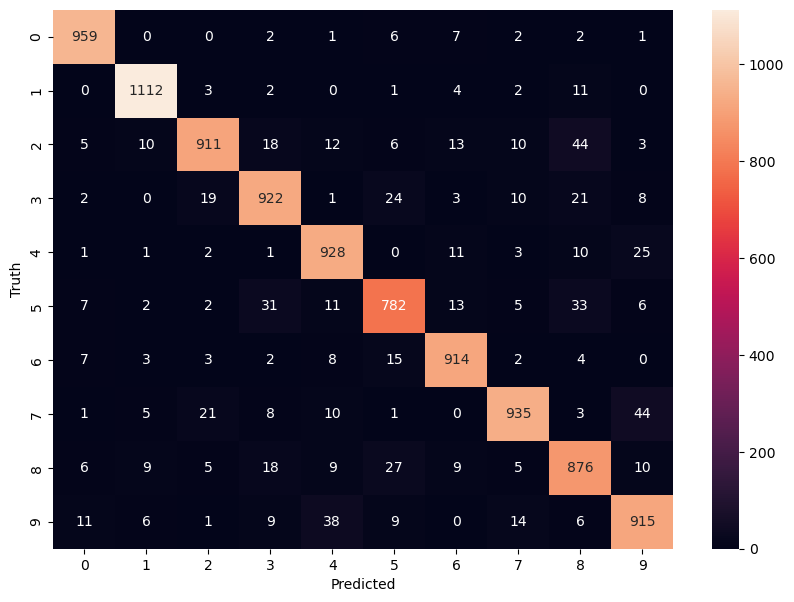

In [126]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add hidden neural network Layer

In [127]:
model = keras.Sequential([
    keras.layers.Dense(500, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_1d,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2282 - accuracy: 0.9349
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0801 - accuracy: 0.9758
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0521 - accuracy: 0.9839
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0372 - accuracy: 0.9884
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0272 - accuracy: 0.9913


In [128]:
model.evaluate(x_test_1d,y_test)

313/313 [==============================] - 3s 3ms/step - loss: 0.0621 - accuracy: 0.9800


[0.062133729457855225, 0.9800000190734863]

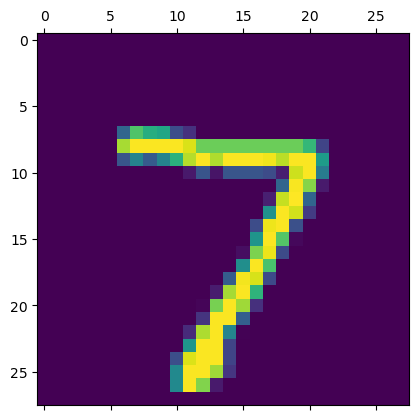

In [129]:
plt.matshow(x_test[0])

In [130]:
pred = model.predict(x_test_1d)
pred[0]

313/313 [==============================] - 3s 3ms/step


array([5.8610886e-03, 4.9493676e-01, 4.3250316e-01, 2.3258623e-01,
       6.2855226e-03, 1.9308012e-03, 2.9851176e-04, 9.9996525e-01,
       4.6950206e-02, 8.3033241e-02], dtype=float32)

In [131]:
np.argmax(pred[0])

7

In [132]:
predicted_number = [np.argmax(i) for i in pred]

In [133]:
predicted_number[:5]

[7, 2, 1, 0, 4]

In [134]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted_number)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    0,    0,    0,    1,    1,    1,    2,    0],
       [   1, 1124,    0,    2,    0,    1,    2,    1,    4,    0],
       [   2,    4,  995,   15,    2,    0,    3,    3,    8,    0],
       [   0,    0,    0, 1001,    0,    1,    0,    3,    2,    3],
       [   2,    1,    0,    1,  949,    0,    6,    0,    1,   22],
       [   2,    1,    0,    9,    1,  871,    1,    0,    5,    2],
       [   3,    2,    0,    1,    2,    3,  947,    0,    0,    0],
       [   4,    4,    6,    2,    0,    0,    0, 1002,    4,    6],
       [   4,    0,    1,    8,    2,    3,    2,    2,  947,    5],
       [   4,    4,    0,    2,    4,    1,    1,    3,    1,  989]])>

Text(95.72222222222221, 0.5, 'Truth')

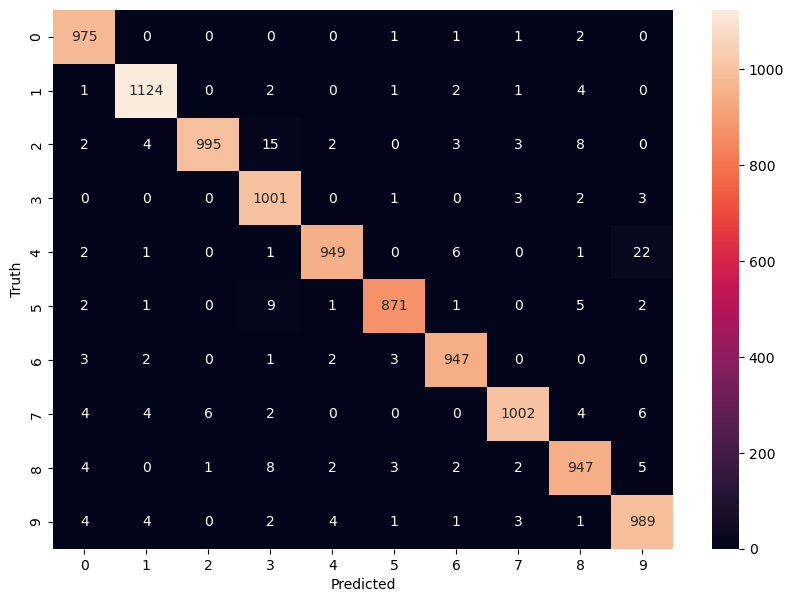

In [135]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add Flatten layer

In [138]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(300, activation='sigmoid'),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2540 - accuracy: 0.9284
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0887 - accuracy: 0.9733
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0590 - accuracy: 0.9816
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0418 - accuracy: 0.9875
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0315 - accuracy: 0.9899


In [139]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 3ms/step - loss: 0.0658 - accuracy: 0.9814


[0.06575699150562286, 0.9814000129699707]

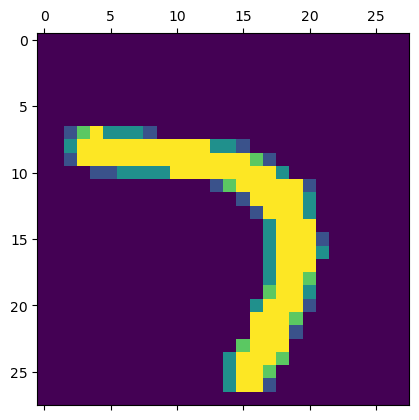

In [146]:
plt.matshow(x_test[60])

In [147]:
pred = model.predict(x_test)
pred[60]

313/313 [==============================] - 3s 3ms/step


array([3.6587380e-02, 1.1924453e-01, 1.6174956e-01, 1.4595126e-01,
       1.0144981e-01, 2.4784109e-01, 9.4628870e-04, 9.9995053e-01,
       1.0901335e-02, 4.9670920e-01], dtype=float32)

In [148]:
np.argmax(pred[60])

7

In [150]:
predicted_number = [np.argmax(i) for i in pred]

Text(95.72222222222221, 0.5, 'Truth')

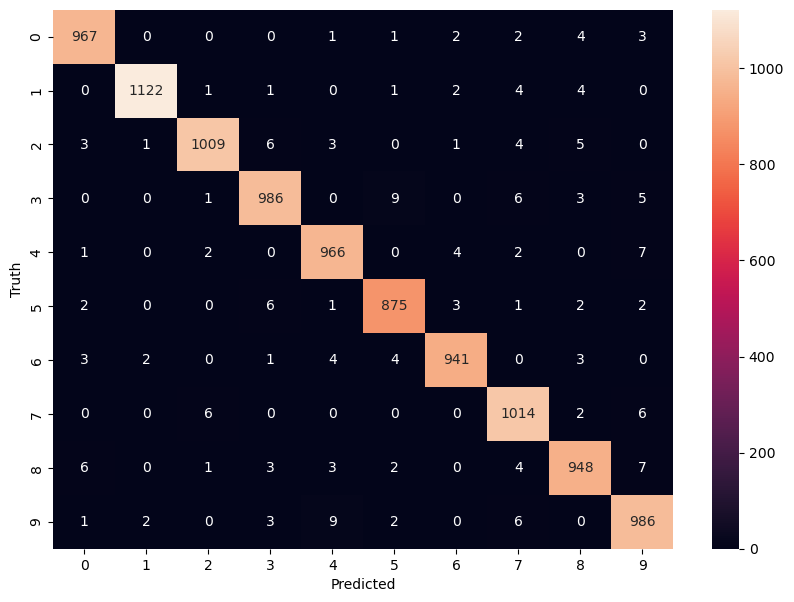

In [144]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted_number)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')